In [ ]:
# packages to store and manipulate data
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
df = pd.read_csv('/content/sample_data/7817_1.csv')
display(df.head())

## Penjelasan Dataset yang digunakan

Dataset yang digunakan adalah data ulasan produk (reviews) yang dimuat dari file CSV `/content/sample_data/7817_1.csv`.

**Rincian Penjelasan:**

1.  **Kasus yang diambil:** Dataset ini berisi ulasan (reviews) dari berbagai produk. Tujuan analisis data ini kemungkinan besar adalah untuk memahami sentimen pelanggan, mengidentifikasi topik-topik diskusi dalam ulasan, atau membangun model untuk memprediksi rating atau aspek lain dari ulasan.

2.  **Penjelasan setiap kolomnya:**
    *   `id`: ID unik untuk setiap produk.
    *   `asins`: Nomor ASIN (Amazon Standard Identification Number) produk.
    *   `brand`: Merek produk.
    *   `categories`: Kategori produk.
    *   `colors`: Warna produk (banyak nilai kosong).
    *   `dateAdded`: Tanggal produk ditambahkan ke database.
    *   `dateUpdated`: Tanggal informasi produk diperbarui.
    *   `dimension`: Dimensi produk (banyak nilai kosong).
    *   `ean`: Nomor EAN (European Article Number) produk (banyak nilai kosong).
    *   `keys`: Kunci identifikasi produk.
    *   `manufacturer`: Produsen produk (banyak nilai kosong).
    *   `manufacturerNumber`: Nomor produsen produk (banyak nilai kosong).
    *   `name`: Nama produk.
    *   `prices`: Informasi harga produk.
    *   `reviews.date`: Tanggal ulasan diberikan (beberapa nilai kosong).
    *   `reviews.doRecommend`: Apakah pengulas merekomendasikan produk (banyak nilai kosong).
    *   `reviews.numHelpful`: Jumlah orang yang menganggap ulasan ini membantu (beberapa nilai kosong).
    *   `reviews.rating`: Rating yang diberikan oleh pengulas (beberapa nilai kosong).
    *   `reviews.sourceURLs`: URL sumber ulasan.
    *   `reviews.text`: Teks lengkap dari ulasan. **Kolom ini adalah fokus utama untuk analisis teks.**
    *   `reviews.title`: Judul ulasan (beberapa nilai kosong).
    *   `reviews.userCity`: Kota pengguna yang memberikan ulasan (semua nilai kosong).
    *   `reviews.userProvince`: Provinsi pengguna yang memberikan ulasan (semua nilai kosong).
    *   `reviews.username`: Nama pengguna yang memberikan ulasan (beberapa nilai kosong).
    *   `sizes`: Ukuran produk (semua nilai kosong).
    *   `upc`: Kode UPC (Universal Product Code) produk (banyak nilai kosong).
    *   `weight`: Berat produk (banyak nilai kosong).

3.  **Import library:** Library yang diimpor di awal notebook (`pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `sklearn`, `re`) digunakan untuk manipulasi data, analisis numerik, visualisasi, pembangunan model, dan pemrosesan teks dasar.

4.  **Load data:** Data dimuat ke dalam pandas DataFrame bernama `df` menggunakan perintah `pd.read_csv('/content/sample_data/7817_1.csv')`.

## Data Understanding

In [ ]:
# 1. Jumlah baris data
num_rows = df.shape[0]
print(f"Jumlah baris data: {num_rows}")

# 2. Panjang rata-rata setiap baris (asumsi data adalah teks)
df['combined_text'] = df.astype(str).agg(' '.join, axis=1)
average_row_length = df['combined_text'].str.len().mean()
print(f"Panjang rata-rata setiap baris: {average_row_length:.2f}")

df = df.drop(columns=['combined_text'])

# 3. Cek data duplikasi
num_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikasi: {num_duplicates}")

if num_duplicates > 0:
    print("Contoh baris duplikat:")
    display(df[df.duplicated(keep=False)].head())

# 4. Cek data kosong
print("\nJumlah data kosong per kolom:")
display(df.isnull().sum())

# 5. Distribusi data


## Data Text Processing

In [ ]:
import nltk

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

print("NLTK resources checked/downloaded.")

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

df['reviews.text'] = df['reviews.text'].fillna('')

df['tokens'] = df['reviews.text'].apply(nltk.word_tokenize)
print("Contoh hasil Tokenisasi:")
display(df[['reviews.text', 'tokens']].head())

In [ ]:
# Initialize Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_tokens(tokens):
    processed_tokens = []
    for token in tokens:
        # 5. Text Normalisasi (lowercase)
        token = token.lower()
        # Remove punctuation and numbers
        token = re.sub(r'[^a-z]', '', token)
        if token and token not in stop_words:
            # 2. Lemmatization
            lemma = lemmatizer.lemmatize(token)
            # 3. Stemming (optional, choose either lemmatization or stemming)
            # stem = stemmer.stem(lemma)
            processed_tokens.append(lemma) # Or use stem if you prefer stemming
    return processed_tokens # Ensure a list is always returned

# Apply processing
df['processed_tokens'] = df['tokens'].apply(process_tokens)
print("\nContoh hasil Lemmatization, Stopword Removal, dan Normalisasi:")
display(df[['tokens', 'processed_tokens']].head())

In [ ]:
# 7. Text Vektorisasi (using TF-IDF)
# Join the processed tokens back into a string for vectorization
df['processed_text'] = df['processed_tokens'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=1000) # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

print("\nContoh hasil Text Vektorisasi (TF-IDF shape):")
print(tfidf_matrix.shape)
# You can further inspect the tfidf_vectorizer.get_feature_names_out() and the matrix

In [ ]:
# 6. Matrix correlation (opsional)
# This step is typically done on the vectorized data to see the correlation between terms
# However, visualizing a correlation matrix of 1000 features is not practical.
# You might want to look at correlations between specific terms or after dimensionality reduction.

# As a simple example, you can calculate pairwise cosine similarity between documents
# This is not a correlation matrix of terms, but a common use case for vectorized text data.
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity for a subset of the data due to potential memory constraints
sample_size = 100 # Adjust as needed
cosine_sim_sample = cosine_similarity(tfidf_matrix[:sample_size], tfidf_matrix[:sample_size])

print(f"\nContoh hasil Cosine Similarity Matrix (untuk {sample_size} sampel):")
print(cosine_sim_sample.shape)
# display(cosine_sim_sample) # Uncomment to display the matrix (can be large)

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Text Vektorisasi

## Data Modeling: Topic Modeling

Untuk melakukan *topic modeling* pada data ulasan ini, kita akan menggunakan salah satu dari dua algoritma yang populer dan efektif:

1.  **Latent Dirichlet Allocation (LDA)**:
    *   **Penjelasan:** LDA adalah model generatif probabilistik untuk koleksi data diskrit seperti korpus teks. LDA memodelkan setiap dokumen sebagai campuran topik, dan setiap topik sebagai campuran kata. Ini mengasumsikan bahwa kata-kata dalam dokumen dihasilkan dari topik-topik yang mendasarinya.
    *   **Mengapa dipilih:** LDA baik untuk menemukan topik tersembunyi dalam koleksi dokumen yang besar. Hasilnya seringkali mudah diinterpretasikan sebagai "topik" yang terdiri dari kata-kata yang sering muncul bersama.

2.  **Non-negative Matrix Factorization (NMF)**:
    *   **Penjelasan:** NMF adalah teknik dekomposisi matriks yang memfaktorkan matriks (dalam kasus ini, matriks TF-IDF) menjadi dua matriks dengan entri non-negatif. Dalam konteks teks, satu matriks merepresentasikan dokumen dalam ruang topik, dan matriks lainnya merepresentasikan topik dalam ruang kata.
    *   **Mengapa dipilih:** NMF juga efektif dalam menemukan pola atau "topik" dalam data teks. Seringkali memberikan hasil yang mirip dengan LDA dan kadang-kadang lebih cepat komputasinya.

**Pilihan Model:** Kita akan menggunakan **Latent Dirichlet Allocation (LDA)** terlebih dahulu karena merupakan algoritma yang sangat umum untuk *topic modeling* dan seringkali memberikan topik yang mudah diinterpretasikan. Jika diperlukan, NMF bisa menjadi alternatif untuk perbandingan.

Model LDA akan diterapkan pada matriks TF-IDF (`tfidf_matrix`) yang sudah kita hasilkan dari tahap pemrosesan teks.

## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya

## Visualize topics

### Subtask:
Visualisasikan topik dan kata-kata kunci terkait menggunakan tabel, bar chart, atau word cloud.

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
n_top_words = 10

topics_data = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[-n_top_words:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    topics_data[f'Topic {topic_idx+1}'] = top_words

topics_df = pd.DataFrame(topics_data)

print("Top words per topic (Table Format):")
display(topics_df)

topic_idx_to_plot = 0
topic_to_plot = lda_model.components_[topic_idx_to_plot]
top_word_indices_to_plot = topic_to_plot.argsort()[-n_top_words:][::-1]
top_words_to_plot = [feature_names[i] for i in top_word_indices_to_plot]
word_weights_to_plot = topic_to_plot[top_word_indices_to_plot]

plt.figure(figsize=(12, 6))
plt.bar(top_words_to_plot, word_weights_to_plot)

plt.title(f'Top {n_top_words} Words for Topic {topic_idx_to_plot + 1}')
plt.xlabel('Words')
plt.ylabel('Weight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)

lda_matrix = lda_model.fit_transform(tfidf_matrix)

print(f"LDA model fitted with {n_topics} topics.")
print(f"Shape of the transformed matrix: {lda_matrix.shape}")

## Extract top words per topic

### Subtask:
Mengambil kata-kata kunci yang paling merepresentasikan setiap topik yang ditemukan.

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

n_top_words = 10

print("Top words for each topic:")
for topic_idx, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[-n_top_words:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    print(f"Topic #{topic_idx+1}: {' '.join(top_words)}")

## Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2, random_state=42)
lda_pca = pca.fit_transform(lda_matrix)

print("PCA berhasil diterapkan.")
print(f"Bentuk hasil PCA: {lda_pca.shape}")

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
lda_tsne = tsne.fit_transform(lda_matrix)

print("\nt-SNE berhasil diterapkan.")
print(f"Bentuk hasil t-SNE: {lda_tsne.shape}")

tsne_df = pd.DataFrame(data=lda_tsne, columns=['TSNE-1', 'TSNE-2'])

plt.figure(figsize=(10, 8))

sns.scatterplot(x='TSNE-1', y='TSNE-2', data=tsne_df)

plt.title('Visualisasi Hasil t-SNE dari Matriks LDA')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()

pca_df = pd.DataFrame(data=lda_pca, columns=['PCA-1', 'PCA-2'])

plt.figure(figsize=(10, 8))

sns.scatterplot(x='PCA-1', y='PCA-2', data=pca_df)

plt.title('Visualisasi Hasil PCA dari Matriks LDA')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

## Topic modeling

### Subtask:
Menerapkan algoritma topic modeling (seperti LDA atau NMF) pada data teks yang sudah divetorisasi (menggunakan `tfidf_matrix`).


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)

lda_matrix = lda_model.fit_transform(tfidf_matrix)

print(f"LDA model fitted with {n_topics} topics.")
print(f"Shape of the transformed matrix: {lda_matrix.shape}")

## Extract top words per topic

### Subtask:
Mengambil kata-kata kunci yang paling merepresentasikan setiap topik yang ditemukan.


In [ ]:
# Get the feature names (words) from the TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Number of top words to display per topic
n_top_words = 10

print("Top words for each topic:")
for topic_idx, topic in enumerate(lda_model.components_):
    # Get the indices of the top words for the current topic
    top_word_indices = topic.argsort()[-n_top_words:][::-1]
    # Get the actual words using the indices
    top_words = [feature_names[i] for i in top_word_indices]
    print(f"Topic #{topic_idx+1}: {' '.join(top_words)}")

Tambahan


**Reasoning**:
The previous command failed because the `gensim` library is not installed. Install the `gensim` library using pip.

In [100]:
%pip install gensim

# Task
Perform sentiment analysis and named entity recognition on the reviews text, explore topics in more depth, evaluate the topic model, and use other vectorization techniques.

## Sentiment analysis

### Subtask:
Load a pre-trained sentiment analysis model or train a simple one.


**Reasoning**:
Import the necessary library for sentiment analysis and instantiate the sentiment analyzer.



In [101]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
print("SentimentIntensityAnalyzer initialized.")

SentimentIntensityAnalyzer initialized.


## Sentiment analysis

### Subtask:
Apply the sentiment analysis model to the reviews text and store the results.


**Reasoning**:
The subtask requires applying the sentiment analysis model and categorizing the results. This can be done by defining a function to get the sentiment score and then applying it to the DataFrame to create the new columns.



In [102]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER if not already initialized (though it should be from the previous step)
try:
    sid
except NameError:
    sid = SentimentIntensityAnalyzer()
    print("SentimentIntensityAnalyzer initialized.")


# 1. Define a function to get the compound sentiment score
def get_sentiment_score(text):
    if pd.isna(text):
        return 0.0 # Return a neutral score for NaN values
    return sid.polarity_scores(str(text))['compound']

# 2. Apply the function to the 'reviews.text' column
df['sentiment_score'] = df['reviews.text'].apply(get_sentiment_score)

# 3. Create the 'sentiment_label' column based on the score
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)

# 4. Display the head of the DataFrame
display(df[['reviews.text', 'sentiment_score', 'sentiment_label']].head())

,reviews.text,sentiment_score,sentiment_label
0,I initially had trouble deciding between the p...,0.9804,Positive
1,Allow me to preface this with a little history...,0.9874,Positive
2,I am enjoying it so far. Great for reading. Ha...,0.4364,Positive
3,I bought one of the first Paperwhites and have...,0.9743,Positive
4,I have to say upfront - I don't like coroporat...,0.9930,Positive


## Sentiment analysis

### Subtask:
Analyze and visualize the sentiment distribution.


**Reasoning**:
Calculate the distribution of sentiment labels and visualize it using a bar plot to understand the sentiment distribution in the dataset.



Sentiment Distribution:
sentiment_label
Positive    1411
Negative     137
Neutral       49
Name: count, dtype: int64


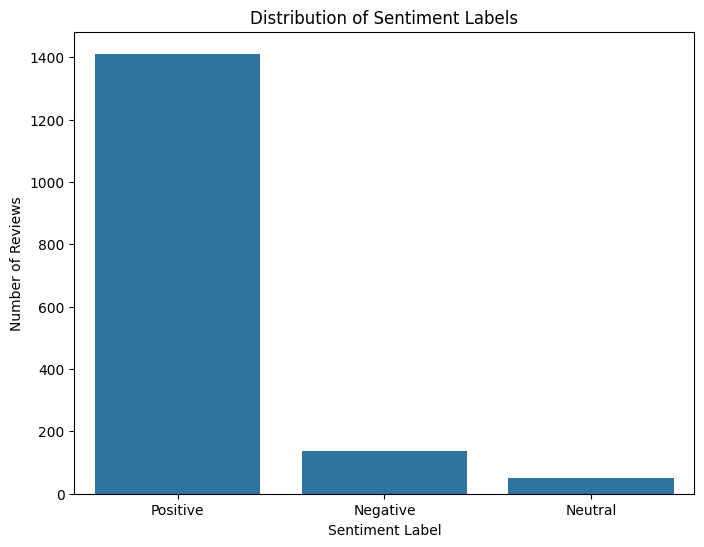

In [103]:
sentiment_distribution = df['sentiment_label'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.show()

## Named entity recognition (ner)

### Subtask:
Load a pre-trained NER model (e.g., from spaCy or NLTK).


**Reasoning**:
Load a pre-trained English language model using spaCy for Named Entity Recognition.



In [104]:
import spacy

try:
    nlp = spacy.load('en_core_web_sm')
    print("spaCy model 'en_core_web_sm' loaded successfully.")
except OSError:
    print("spaCy model 'en_core_web_sm' not found. Downloading...")
    # Use !python -m spacy download en_core_web_sm to download the model
    # Note: This command needs to be run in a separate cell or handled differently
    # in a non-interactive script. In a notebook, you can run it directly.
    print("Please run the following command in a new cell to download the model:")
    print("!python -m spacy download en_core_web_sm")
    nlp = None # Set nlp to None if model loading fails

spaCy model 'en_core_web_sm' loaded successfully.


## Named entity recognition (ner)

### Subtask:
Apply the NER model to extract named entities from the reviews.


**Reasoning**:
Define a function to extract named entities using spaCy and apply it to the reviews text column, then display the head of the dataframe.



In [105]:
# 1. Define a function to extract named entities
def extract_named_entities(text):
    if pd.isna(text) or not isinstance(text, str):
        return [] # Return an empty list for NaN or non-string values
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# 2. Apply the function to the 'reviews.text' column
# Ensure nlp model was loaded successfully
if nlp:
    df['named_entities'] = df['reviews.text'].apply(extract_named_entities)
    # 3. Display the head of the DataFrame
    print("\nDataFrame head with reviews.text and named_entities:")
    display(df[['reviews.text', 'named_entities']].head())
else:
    print("spaCy model not loaded. Cannot perform NER.")



DataFrame head with reviews.text and named_entities:


,reviews.text,named_entities
0,I initially had trouble deciding between the p...,"[(300, CARDINAL), (80 dollar, MONEY), (a week,..."
1,Allow me to preface this with a little history...,"[(a Nook Simple Touch, PERSON), (2011, DATE), ..."
2,I am enjoying it so far. Great for reading. Ha...,"[(2012, DATE), (Paperwhite, PERSON)]"
3,I bought one of the first Paperwhites and have...,"[(first, ORDINAL), (every three days, DATE), (..."
4,I have to say upfront - I don't like coroporat...,"[(Apple, ORG), (Amazon, ORG), (a Nook Touch, W..."


## Named entity recognition (ner)

### Subtask:
Analyze and visualize the most common named entities.


**Reasoning**:
Extract all named entities into a single list, count their occurrences by entity type, and visualize the top entities and entity type distribution using bar charts.



Top 20 most common named entities:
'Amazon' (ORG): 1108
'Apple' (ORG): 370
'first' (ORDINAL): 358
'HDX' (ORG): 338
'iPad' (ORG): 290
'Kindle' (GPE): 242
'Alexa' (ORG): 242
'one' (CARDINAL): 178
'last year's' (DATE): 173
'3' (CARDINAL): 147
'Echo' (LOC): 141
'years' (DATE): 137
'First' (ORDINAL): 137
'Comcast' (ORG): 133
'three' (CARDINAL): 131
'Tap' (ORG): 127
'second' (ORDINAL): 126
'Roku' (ORG): 121
'Kindle' (LOC): 120
'Netflix' (GPE): 113


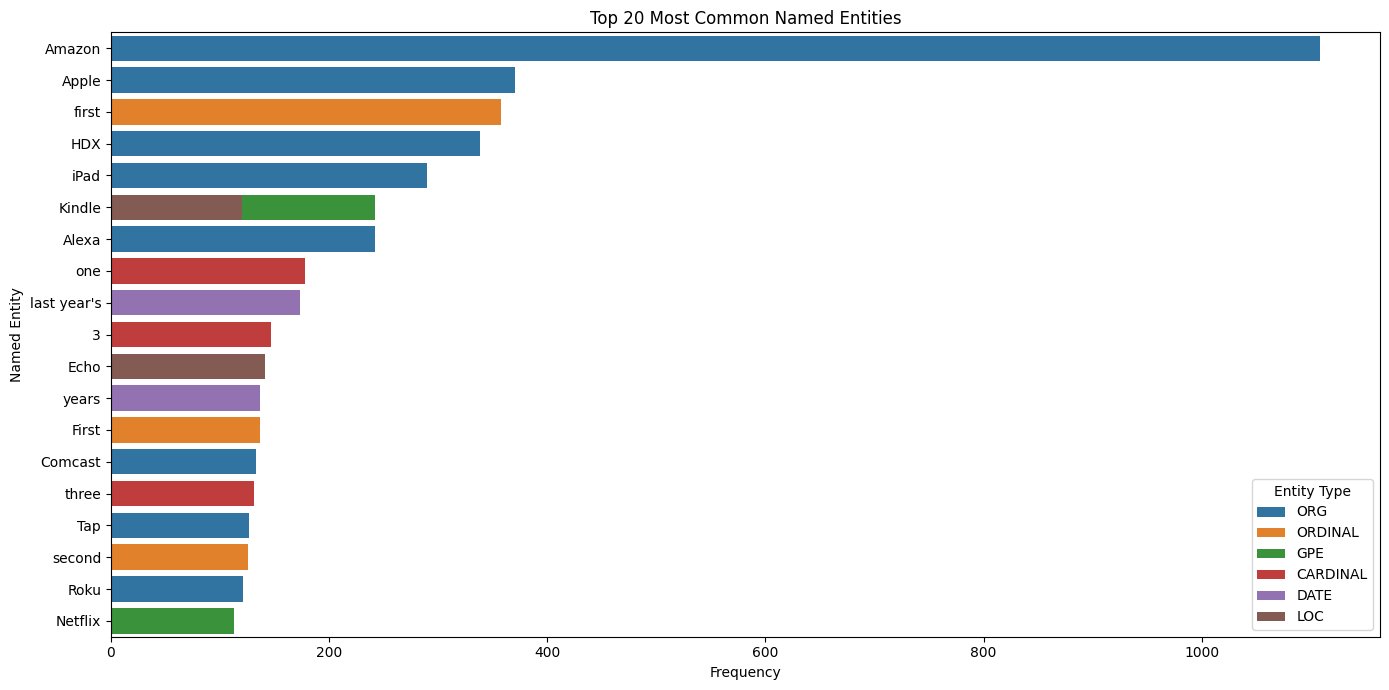

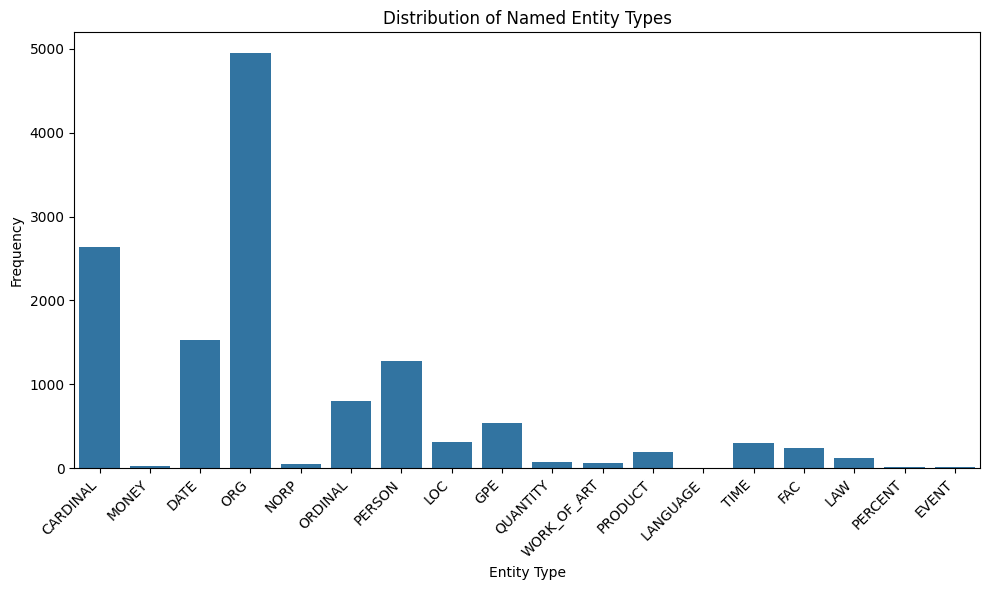

In [106]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a single list of all extracted named entities
all_entities = [entity for sublist in df['named_entities'] for entity in sublist]

# 2. Count the occurrences of each unique named entity and their corresponding entity type.
entity_counts = Counter(all_entities)

# Separate counts by entity type for visualization
entity_type_counts = Counter([entity[1] for entity in all_entities])

# 3. Identify the most common named entities overall
n_top_entities = 20 # Number of top entities to display
top_entities = entity_counts.most_common(n_top_entities)

print(f"Top {n_top_entities} most common named entities:")
for entity, count in top_entities:
    print(f"'{entity[0]}' ({entity[1]}): {count}")

# 4. Visualize the top N most common entities using a bar chart.
if top_entities:
    entities_to_plot = [entity[0] for entity, count in top_entities]
    counts_to_plot = [count for entity, count in top_entities]
    entity_types_to_plot = [entity[1] for entity, count in top_entities] # Get entity types for coloring

    plt.figure(figsize=(14, 7))
    # Use hue to color by entity type
    sns.barplot(x=counts_to_plot, y=entities_to_plot, hue=entity_types_to_plot, dodge=False)
    plt.title(f'Top {n_top_entities} Most Common Named Entities')
    plt.xlabel('Frequency')
    plt.ylabel('Named Entity')
    plt.legend(title='Entity Type')
    plt.tight_layout()
    plt.show()
else:
    print("No entities found to plot.")

# Visualize the distribution of entity types
if entity_type_counts:
    entity_types = list(entity_type_counts.keys())
    type_counts = list(entity_type_counts.values())

    plt.figure(figsize=(10, 6))
    sns.barplot(x=entity_types, y=type_counts)
    plt.title('Distribution of Named Entity Types')
    plt.xlabel('Entity Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No entity types found to plot.")

## More in-depth exploration of topics

### Subtask:
Assign the dominant topic to each document.


**Reasoning**:
Determine the dominant topic for each document and add it as a new column to the DataFrame.



In [107]:
# 1. Determine the dominant topic index for each document
dominant_topic_indices = lda_matrix.argmax(axis=1)

# 2. Store these dominant topic indices in a new column in the df DataFrame (+1 for readability)
df['dominant_topic'] = dominant_topic_indices + 1

# 3. Display the head of the DataFrame to show the new 'dominant_topic' column
print("DataFrame head with dominant topic:")
display(df[['reviews.text', 'dominant_topic']].head())

DataFrame head with dominant topic:


,reviews.text,dominant_topic
0,I initially had trouble deciding between the p...,3
1,Allow me to preface this with a little history...,3
2,I am enjoying it so far. Great for reading. Ha...,3
3,I bought one of the first Paperwhites and have...,3
4,I have to say upfront - I don't like coroporat...,3


## More in-depth exploration of topics

### Subtask:
Analyze the characteristics of documents within each topic (e.g., average rating, common entities, sentiment).


**Reasoning**:
Analyze the characteristics of documents within each topic by grouping the dataframe by dominant topic and calculating the average rating, sentiment distribution, and most common named entities for each group.



In [108]:
from collections import Counter

# 1. Group the DataFrame by 'dominant_topic'
grouped_by_topic = df.groupby('dominant_topic')

print("Analyzing characteristics per topic:")

# Iterate through each topic group
for topic_id, group in grouped_by_topic:
    print(f"\n--- Topic {topic_id} ---")

    # 2. Calculate the average 'reviews.rating' for the topic group
    average_rating = group['reviews.rating'].mean()
    print(f"Average Rating: {average_rating:.2f}")

    # 3. Count the occurrences of each 'sentiment_label' for the topic group
    sentiment_distribution = group['sentiment_label'].value_counts()
    print("\nSentiment Distribution:")
    display(sentiment_distribution)

    # 4. Collect all 'named_entities' and count the most common ones
    all_entities_in_topic = [entity for sublist in group['named_entities'] for entity in sublist]
    entity_counts_in_topic = Counter(all_entities_in_topic)

    n_top_entities_per_topic = 10 # Display top 10 entities per topic
    top_entities_in_topic = entity_counts_in_topic.most_common(n_top_entities_per_topic)

    print(f"\nTop {n_top_entities_per_topic} Most Common Named Entities:")
    if top_entities_in_topic:
        for entity, count in top_entities_in_topic:
            print(f"'{entity[0]}' ({entity[1]}): {count}")
    else:
        print("No named entities found for this topic.")


Analyzing characteristics per topic:

--- Topic 1 ---
Average Rating: 4.56

Sentiment Distribution:


,count
sentiment_label,
Positive,57
Neutral,10



Top 10 Most Common Named Entities:
'iPad' (ORG): 58
'first' (ORDINAL): 58
'Amazon' (ORG): 51
'99' (CARDINAL): 29
'the Kindle Fire HD 6' (FAC): 29
'8' (CARDINAL): 29
'tertiary' (ORDINAL): 29
'year' (DATE): 29
'First' (ORDINAL): 29
'Fire TV' (ORG): 17

--- Topic 2 ---
Average Rating: 4.45

Sentiment Distribution:


,count
sentiment_label,
Positive,30
Negative,24
Neutral,1



Top 10 Most Common Named Entities:
'iPad' (ORG): 134
'last year's' (DATE): 93
'HDX' (ORG): 69
'year' (DATE): 47
'7' (CARDINAL): 42
'first' (ORDINAL): 40
'Kindle' (PERSON): 29
'4-5 hours' (TIME): 27
'Email / Documents / Spreadsheet / PDF' (ORG): 27
'1-2 hours' (TIME): 27

--- Topic 3 ---
Average Rating: 4.38

Sentiment Distribution:


,count
sentiment_label,
Positive,1092
Negative,110
Neutral,31



Top 10 Most Common Named Entities:
'Amazon' (ORG): 875
'HDX' (ORG): 241
'Alexa' (ORG): 230
'Kindle' (GPE): 219
'first' (ORDINAL): 219
'one' (CARDINAL): 160
'3' (CARDINAL): 147
'Comcast' (ORG): 133
'Echo' (LOC): 129
'Tap' (ORG): 127

--- Topic 4 ---
Average Rating: 3.80

Sentiment Distribution:


,count
sentiment_label,
Positive,102
Neutral,6
Negative,3



Top 10 Most Common Named Entities:
'Apple' (ORG): 236
'Amazon' (ORG): 118
'years' (DATE): 118
'EarPods' (ORG): 62
'three' (CARDINAL): 59
'dozens' (CARDINAL): 59
'15-50' (CARDINAL): 59
'about a year' (DATE): 59
'iPhones' (ORG): 31
'first' (ORDINAL): 31

--- Topic 5 ---
Average Rating: 4.60

Sentiment Distribution:


,count
sentiment_label,
Positive,130
Neutral,1



Top 10 Most Common Named Entities:
'Amazon' (ORG): 62
'16' (CARDINAL): 60
'6' (CARDINAL): 58
'Easy' (PERSON): 56
'First' (ORDINAL): 52
'Apple' (ORG): 43
'Sony' (ORG): 43
'only 25' (CARDINAL): 43
'Second' (ORDINAL): 42
'100' (CARDINAL): 42


## More in-depth exploration of topics

### Subtask:
Visualize document distribution per topic.


**Reasoning**:
Calculate the distribution of documents per dominant topic and visualize it using a bar plot as requested by the subtask instructions.



Distribution of Documents per Dominant Topic:
dominant_topic
1      67
2      55
3    1233
4     111
5     131
Name: count, dtype: int64


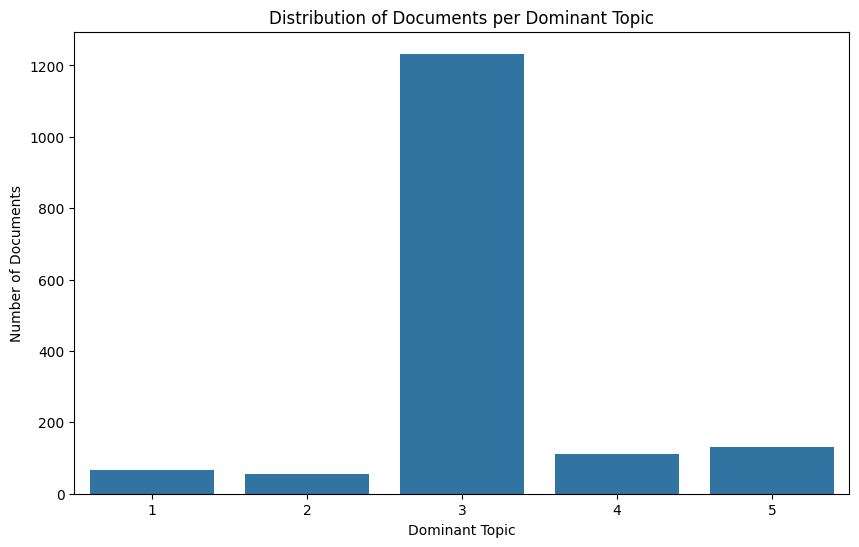

In [109]:
# 1. Calculate the number of documents assigned to each dominant topic.
topic_distribution = df['dominant_topic'].value_counts().sort_index()

print("Distribution of Documents per Dominant Topic:")
print(topic_distribution)

# 2. Create a bar plot to visualize the distribution of documents across the dominant topics.
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_distribution.index, y=topic_distribution.values)

# 3. Label the x-axis as 'Dominant Topic' and the y-axis as 'Number of Documents'.
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Documents')

# 4. Add a title to the plot, such as 'Distribution of Documents per Dominant Topic'.
plt.title('Distribution of Documents per Dominant Topic')

# 5. Display the plot.
plt.show()